<a href="https://colab.research.google.com/github/wendychen215/aop113b/blob/main/%E4%BD%9C%E6%A5%AD%E4%BA%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW03 Data Analysis

## 各項因素對學生學業成績影響分析報告

## 摘要

基於Kaggle上*spscientist/students-performance-in-exams*資料

進行性別和考試成績之間的關係,父母學歷和考試成績之間的關係，午餐狀況或是否參加備考課程是否對成績有明顯影響。

## 引言

### 背景
在當代教育環境中，學生的學業表現受到多種社會與家庭因素的影響。研究指出，性別差異、族群歸屬、家庭社經地位、父母教育程度等背景變項，皆可能與學業成就呈現正負相關。此外，學校提供的資源（如午餐補助或考前輔導）也被視為潛在影響學習成果的因素。因此，針對這些變項進行分析，有助於教育工作者理解學生成績差異的可能來源，並進一步制定更有效的教學與輔導策略。

### 目的
本研究旨在探討學生個人與家庭背景對其學業成績（數學、閱讀與寫作）的潛在影響。

### 待答問題
1. 性別是否會影響學生在學業成績上的表現？
2. 父母的教育程度與學生的成績之間有何關聯？
3. 午餐狀況是否對成績有明顯影響？
4. 是否參加備考課程是否對成績有明顯影響？

## 方法

### 數據來源
本研究使用 Kaggle上的學生學業成績和多元背景資料進行分析，該數據集包含性別、族群、父母的教育程度、是否享有免費或減價午餐、是否參加過備考課程等。
### 分析工具
- **Python**（數據處理與分析）
- **Pandas**（數據清理與統計分析）
- **Matplotlib / Seaborn**（數據視覺化）

### 數據處理
1. 載入 `Kaggle` 數據集並檢視數據概況。
2. 探討數據間的相關性。
3. 繪製散點圖、長條圖、盒狀圖等，分析關鍵變數之間的關係。

In [132]:
!wget -O taipei_sans_tc_beta.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download


--2025-06-15 08:47:48--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.101.139, 142.250.101.113, 142.250.101.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.101.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2025-06-15 08:47:48--  https://drive.usercontent.google.com/download?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.137.132, 2607:f8b0:4023:c03::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.137.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20659344 (20M) [application/octet-stream]
Saving to: ‘taipei_sans_tc_beta.ttf’

taipei_sans_tc_beta 100%[===================>]  19.70M  18.2MB/s    in 1.1s    

2025-06-15 08:47:5

In [133]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.font_manager.fontManager.addfont('taipei_sans_tc_beta.ttf')

plt.rcParams['font.sans-serif'] = 'Taipei Sans TC Beta'
plt.rcParams["axes.unicode_minus"] = False

In [134]:
import kagglehub
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

In [135]:
import os
print(os.listdir(path))

['StudentsPerformance.csv']


In [151]:
import pandas as pd
import os

csv_file_name = 'StudentsPerformance.csv'
full_csv_path = os.path.join(path, csv_file_name)

df = pd.read_csv(full_csv_path)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


計算學業成績(取數學、閱讀與寫作整數平均)

In [160]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1).round()
print(df[['math score', 'reading score', 'writing score', 'average_score']].head())

   math score  reading score  writing score  average_score
0          72             72             74           73.0
1          69             90             88           82.0
2          90             95             93           93.0
3          47             57             44           49.0
4          76             78             75           76.0


## 結果與分析

### 性別與學業成績的關係
我們使用長條圖來觀察性別（gender）與各項成績（數學、閱讀與寫作）、平均學業成績（average_score）之間的關係。

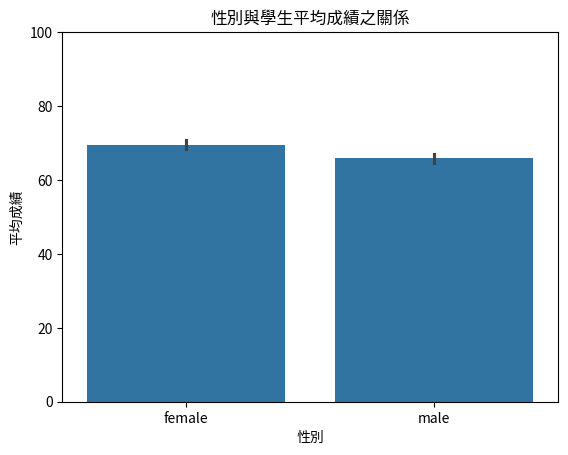

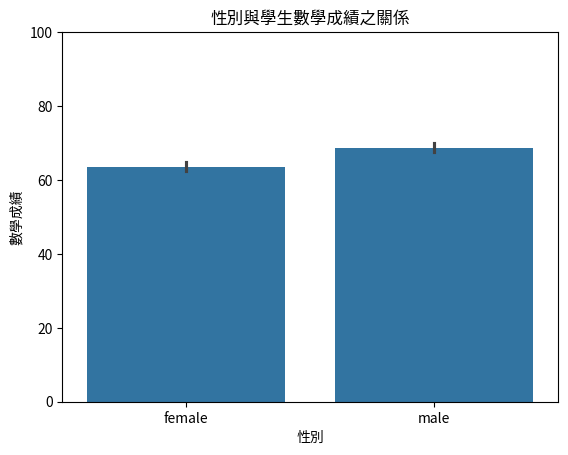

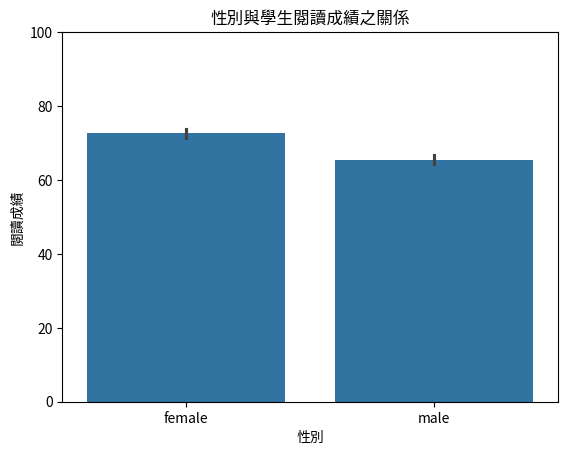

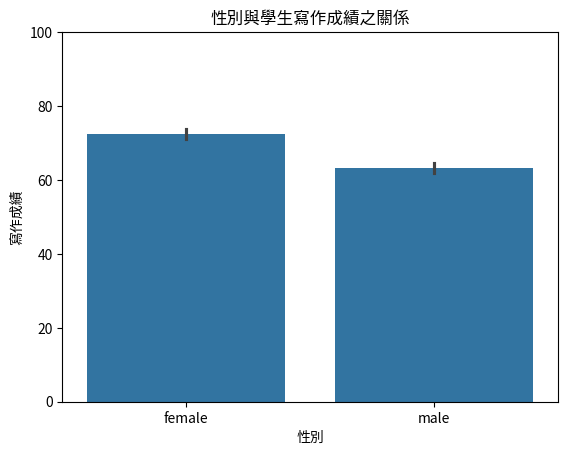

In [167]:
sns.barplot(data=df, x='gender', y='average_score')

plt.title('性別與學生平均成績之關係')
plt.xlabel('性別')
plt.ylabel('平均成績')
plt.ylim(0, 100)
plt.show()

sns.barplot(data=df, x='gender', y='math score')

plt.title('性別與學生數學成績之關係')
plt.xlabel('性別')
plt.ylabel('數學成績')
plt.ylim(0, 100)
plt.show()

sns.barplot(data=df, x='gender', y='reading score')

plt.title('性別與學生閱讀成績之關係')
plt.xlabel('性別')
plt.ylabel('閱讀成績')
plt.ylim(0, 100)
plt.show()

sns.barplot(data=df, x='gender', y='writing score')

plt.title('性別與學生寫作成績之關係')
plt.xlabel('性別')
plt.ylabel('寫作成績')
plt.ylim(0, 100)
plt.show()

**分析結果**

從圖中可以看出，女性在寫作、閱讀和整體平均分數稍高，男性則是在數學成績稍高，但各項兩者差異皆不大，比較沒有參考性。

### 父母的教育程度及學生的學業成績的關係

我們使用長條圖觀察父母的教育程度與學生的學業成績的關係。

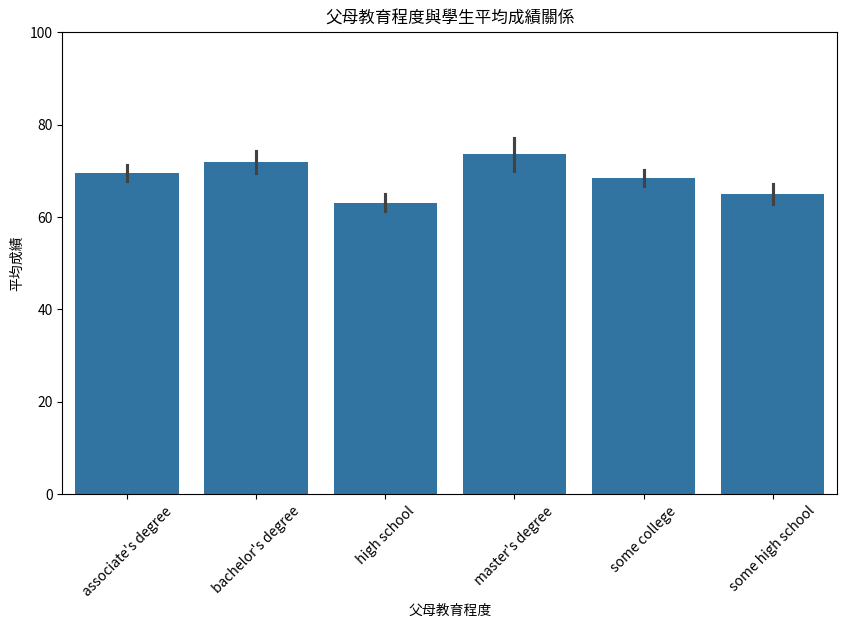

In [163]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='parental level of education', y='average_score', order=sorted(df['parental level of education'].unique()))
plt.title('父母教育程度與學生平均成績關係')
plt.xlabel('父母教育程度')
plt.ylabel('平均成績')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.show()

學歷由高到低為：

master's degree（碩士學位）

bachelor's degree（學士學位）

associate's degree（副學士學位）

some college（上過大學但未畢業）

high school（高中畢業）

some high school（未完成高中）

**分析結果**

整體趨勢父母教育程度越高，學生平均成績也越高。

此關係可能源於：

*   父母更有能力輔導功課
*   更重視教育的家庭文化
*   更好的學習資源與環境

### 午餐狀況及學業成績的關係

我們使用長條圖觀察午餐狀況與學生的學業成績的關係。

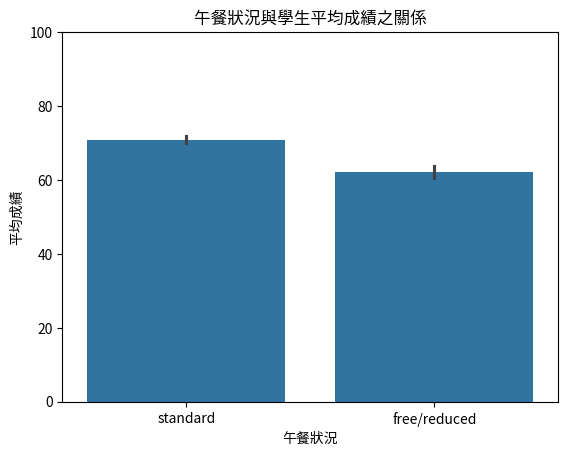

In [165]:
sns.barplot(data=df, x='lunch', y='average_score')

plt.title('午餐狀況與學生平均成績之關係')
plt.xlabel('午餐狀況')
plt.ylabel('平均成績')
plt.ylim(0, 100)
plt.show()

*備註：如果一位學生領取「free/reduced lunch」，代表他來自中低收入家庭，是教育調查中常見的社經地位指標之一。*

**分析結果**

- 享有減免午餐的學生的學業成績較低於沒有享用減免午餐的學生。
- 側面證明家庭社經地位對學業成績有一定影響。

### 是否參加備考課程及學業成績的關係

我們使用長條圖觀察是否參加備考課程與學生的學業成績的關係。

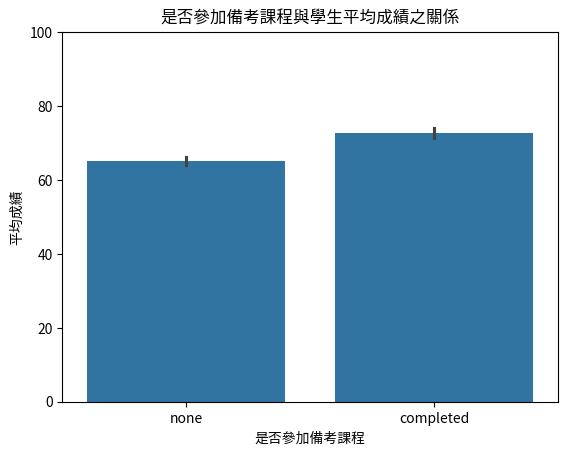

In [166]:
sns.barplot(data=df, x='test preparation course', y='average_score')

plt.title('是否參加備考課程與學生平均成績之關係')
plt.xlabel('是否參加備考課程')
plt.ylabel('平均成績')
plt.ylim(0, 100)
plt.show()

**分析結果**

- 參加備考課程有助於提升成績

## 結論與建議


### 結論
綜合分析結果顯示，雖然性別對學業成績的影響不大，但家庭背景因素如社經地位與父母教育程度，對學生的整體表現具有明顯關聯。來自經濟較困難家庭、父母教育程度較低的學生，其學業表現普遍較弱。此外，參加備考課程的學生成績普遍較高，顯示額外學習資源對學習成效有正面助益。

### 建議

1.   加強對弱勢學生的學習支持：可透過學校提供免費課輔、教材補助、心理支持等方式，縮小學習落差。
2.   推動親職教育與家庭參與：鼓勵家長參與孩子的學習歷程，提升家庭對教育的重視程度。
3.   強化學校補救教學與備考輔導：提供有系統的備考課程與資源，協助學生掌握應試技巧與自信。




